### import bilbiotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
pd.set_option('display.max_columns', None)

### wczytanie danych indywidualnych

In [3]:
player_df = pd.read_csv('football_players_data.csv', na_values='-')
print(player_df.shape)
player_df.head(5)

(11318, 47)


,Unnamed: 0,NAME,TEAM,POS,NAT,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,SAVES,GOALS CON,PEN CON,PEN SAVE,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,MATCH_ID
0,NaN,B. Leno,Fulham,GK,NaN,Germany,90,NaN,NaN,NaN,NaN,NaN,NaN,0/0,1/1,0/1,1.0,1.0,NaN,12.0,NaN,48.0,NaN,9.0,NaN,39.0,69%,4.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.8,3356597
1,NaN,K. Tete,Fulham,DR,NaN,Netherlands,90,NaN,NaN,NaN,NaN,NaN,1.0,1/0,2/0,7/2,1.0,NaN,NaN,9.0,NaN,47.0,3.0,6.0,NaN,24.0,75%,4.0,2.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,3356597
2,NaN,I. Diop,Fulham,DCR,NaN,France,90,NaN,NaN,NaN,NaN,NaN,NaN,4/3,0/0,0/4,5.0,NaN,NaN,7.0,NaN,45.0,NaN,NaN,NaN,35.0,80%,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,3356597
3,NaN,C. Bassey,Fulham,DCL,NaN,Nigeria,90,NaN,NaN,1.0,NaN,2.0,NaN,1/1,2/1,6/2,3.0,1.0,NaN,7.0,NaN,73.0,NaN,4.0,NaN,62.0,92%,7.0,6.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,3356597
4,NaN,A. Robinson,Fulham,DL,NaN,United States,90,NaN,NaN,NaN,NaN,NaN,NaN,8/6,3/2,14/10,6.0,NaN,NaN,14.0,1.0,64.0,2.0,7.0,NaN,33.0,76%,7.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,3356597


### wczytanie danych pomocniczych z datami spotkań

In [4]:
match_df = pd.read_csv('matches_data.csv')
print(match_df.shape)
match_df.head(5)

(380, 4)


,Date,Home,Away,match_id
0,2024-08-16,Man Utd,Fulham,3356597
1,2024-08-17,Ipswich,Liverpool,3356598
2,2024-08-17,Newcastle,Southampton,3356601
3,2024-08-17,Everton,Brighton,3356600
4,2024-08-17,Notts Forest,Bournemouth,3356602


### złączenie tabel

In [5]:
df = pd.merge(left=player_df, right=match_df, left_on='MATCH_ID', right_on='match_id', how='inner')
print(df.shape)
df.head(5)

(11318, 51)


,Unnamed: 0,NAME,TEAM,POS,NAT,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,SAVES,GOALS CON,PEN CON,PEN SAVE,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,MATCH_ID,Date,Home,Away,match_id
0,NaN,B. Leno,Fulham,GK,NaN,Germany,90,NaN,NaN,NaN,NaN,NaN,NaN,0/0,1/1,0/1,1.0,1.0,NaN,12.0,NaN,48.0,NaN,9.0,NaN,39.0,69%,4.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.8,3356597,2024-08-16,Man Utd,Fulham,3356597
1,NaN,K. Tete,Fulham,DR,NaN,Netherlands,90,NaN,NaN,NaN,NaN,NaN,1.0,1/0,2/0,7/2,1.0,NaN,NaN,9.0,NaN,47.0,3.0,6.0,NaN,24.0,75%,4.0,2.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,3356597,2024-08-16,Man Utd,Fulham,3356597
2,NaN,I. Diop,Fulham,DCR,NaN,France,90,NaN,NaN,NaN,NaN,NaN,NaN,4/3,0/0,0/4,5.0,NaN,NaN,7.0,NaN,45.0,NaN,NaN,NaN,35.0,80%,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,3356597,2024-08-16,Man Utd,Fulham,3356597
3,NaN,C. Bassey,Fulham,DCL,NaN,Nigeria,90,NaN,NaN,1.0,NaN,2.0,NaN,1/1,2/1,6/2,3.0,1.0,NaN,7.0,NaN,73.0,NaN,4.0,NaN,62.0,92%,7.0,6.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,3356597,2024-08-16,Man Utd,Fulham,3356597
4,NaN,A. Robinson,Fulham,DL,NaN,United States,90,NaN,NaN,NaN,NaN,NaN,NaN,8/6,3/2,14/10,6.0,NaN,NaN,14.0,1.0,64.0,2.0,7.0,NaN,33.0,76%,7.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,3356597,2024-08-16,Man Utd,Fulham,3356597


### zmiana nazw kolumn

In [6]:
df_renamed = df.rename(columns={'Unnamed: 5': 'COUNTRY',
                                'Unnamed: 6': 'MINUTES_PLAYED',
                                'Unnamed: 7': 'GOALS',
                                'Unnamed: 8': 'ASSISTS',
                                'Unnamed: 9': 'YELLOW_CARDS',
                                'Unnamed: 10': 'RED_CARDS',}).drop(['Unnamed: 0', 'NAT', 'MATCH_ID', 'match_id', 'SAVES',
                                                                    'GOALS CON', 'PEN CON', 'PEN SAVE'], axis=1)
print(df_renamed.shape)
df_renamed.head(5)

(11318, 43)


,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,Home,Away
0,B. Leno,Fulham,GK,Germany,90,NaN,NaN,NaN,NaN,NaN,NaN,0/0,1/1,0/1,1.0,1.0,NaN,12.0,NaN,48.0,NaN,9.0,NaN,39.0,69%,4.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,2024-08-16,Man Utd,Fulham
1,K. Tete,Fulham,DR,Netherlands,90,NaN,NaN,NaN,NaN,NaN,1.0,1/0,2/0,7/2,1.0,NaN,NaN,9.0,NaN,47.0,3.0,6.0,NaN,24.0,75%,4.0,2.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,6.3,2024-08-16,Man Utd,Fulham
2,I. Diop,Fulham,DCR,France,90,NaN,NaN,NaN,NaN,NaN,NaN,4/3,0/0,0/4,5.0,NaN,NaN,7.0,NaN,45.0,NaN,NaN,NaN,35.0,80%,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,2024-08-16,Man Utd,Fulham
3,C. Bassey,Fulham,DCL,Nigeria,90,NaN,NaN,1.0,NaN,2.0,NaN,1/1,2/1,6/2,3.0,1.0,NaN,7.0,NaN,73.0,NaN,4.0,NaN,62.0,92%,7.0,6.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.9,2024-08-16,Man Utd,Fulham
4,A. Robinson,Fulham,DL,United States,90,NaN,NaN,NaN,NaN,NaN,NaN,8/6,3/2,14/10,6.0,NaN,NaN,14.0,1.0,64.0,2.0,7.0,NaN,33.0,76%,7.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,7.5,2024-08-16,Man Utd,Fulham


## Wyjaśnienie nazw zmiennych
- NAME: nazwisko zawodnika 
- TEAM: druzyna zawodnika
- POS: pozycja
- COUNTRY: kraj pochodzenia
- MINUTES_PLAYED: liczba rozegranych minut
- GOALS: liczba strzelonych bramek
- ASSISTS: liczba asyst
- YELLOW_CARDS: liczba otrzymanych zoltych kartek
- RED_CARDS: liczba uzyskanych czerwonych kartek
- FOULS: liczba popełnionych fauli
- FOULED: liczba akcji, gdzie zawodnik został sfaulowany
- TACKLES ATT/WON: liczba prób wślizgów / liczba udanych wślizgów
- AERIALS ATT/WON: liczba stoczonych pojedynków powietrznych / liczba wygranych pojedynków powietrznych
- DUELS ATT/WON: liczba stoczonych pojedynków 1 na 1 / liczba wygranych pojedynków 1 na 1
- CLEAR: wybić piłki
- ERR CHANCE: liczba błędów, które doprowadziły do akcji przeciwnika
- ERR GOAL: liczba błędów, które doprowadziły do sraty bramki
- POSS LOST: liczba strat piłki
- OFFSIDE: liczba akcji, w których zawodnik był na spalonym
- TOUCHES: liczba kontaktów z piłką
- INTERCEP: liczba przecięć podań
- RECOV: liczba odbiorów piłki
- LAST MAN TACKLE: liczba wślizgów jako ostatni zawodnik
- PASSES: liczba podań
- PASS COMP %: procent udanych podań
- FINAL THIRD: liczba podań w trzecią tercję 
- LONG BALL: liczba zagranych długich piłek
- PEN: liczba bramek z rzutów karnych
- SHOTS: liczba oddanych strzałów
- ON TARGET: liczba celnych strzałów
- BLOCKED: liczba zablokowanych strzałów
- DRIBBLES: liczba udanych dryblingów
- TOUCHES IN BOX: liczba kontaktów z piłką w polu karnym przeciwnika
- BIG CHANGE: liczba stworzonych wielkich szans
- CROSSES: liczba dośrodkowań
- DECISIVE: liczba kluczowych akcji
- FIRST: liczba strzelonych pierwszych bramek w meczu
- EQUALISER: liczba strzelonych bramek na remis
- PEN WON: liczba wywalczonych rzutów karnych
- RATING: ocena meczowa
- Date: data rozgrywania meczu
- Home: nazwa druzyny grającej u siebie
- Away: nazwa druzyny grającej na wyjeździe


### imputacja wartości brakujących

Wartości brakujące oznaczają po prostu liczbę 0, więc właśnie zerami zostaną one wypełnione

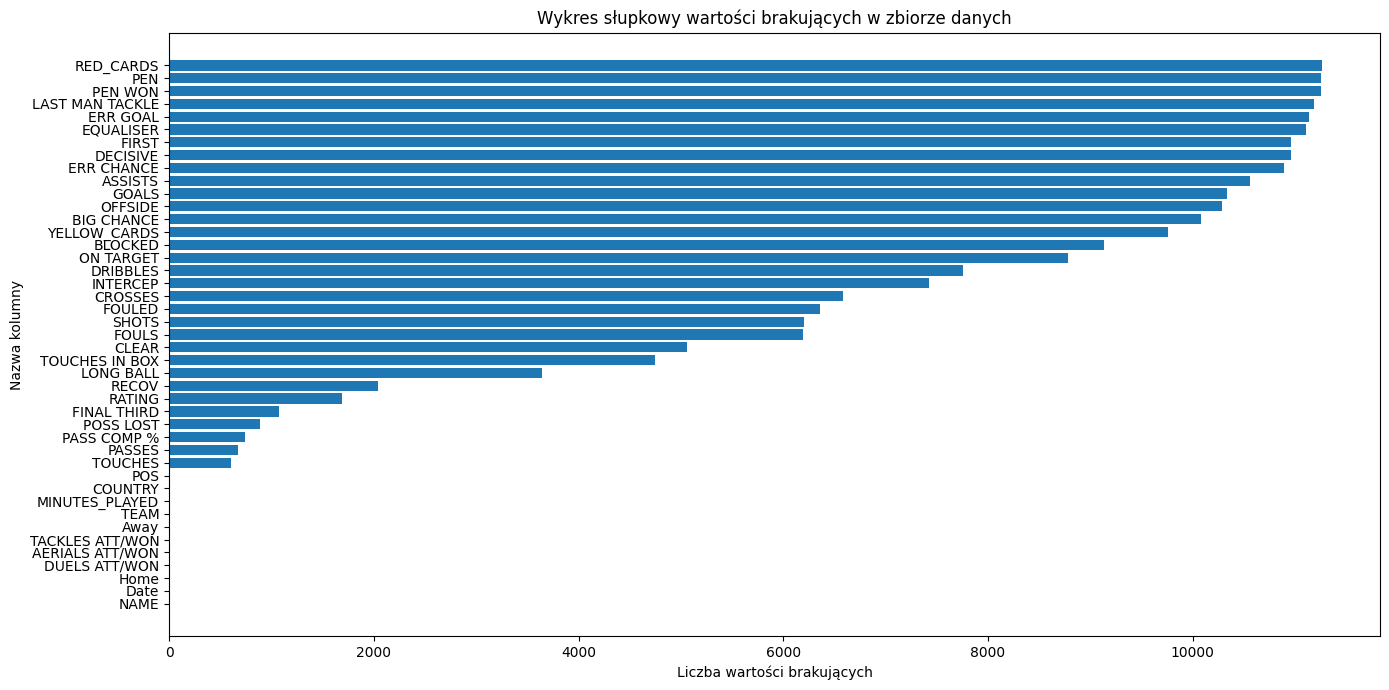

In [7]:
na_values = df_renamed.isna().sum().sort_values()

plt.figure(figsize=(14,7))
plt.barh(y=na_values.index, width=na_values)
plt.title('Wykres słupkowy wartości brakujących w zbiorze danych')
plt.xlabel('Liczba wartości brakujących')
plt.ylabel('Nazwa kolumny')
plt.tight_layout()
plt.show()

In [8]:
df_non_na = df_renamed.fillna(0)
print(df_non_na.shape)
df_non_na.head(5)

(11318, 43)


,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,Home,Away
0,B. Leno,Fulham,GK,Germany,90,0.0,0.0,0.0,0.0,0.0,0.0,0/0,1/1,0/1,1.0,1.0,0.0,12.0,0.0,48.0,0.0,9.0,0.0,39.0,69%,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8,2024-08-16,Man Utd,Fulham
1,K. Tete,Fulham,DR,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1/0,2/0,7/2,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,75%,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,Man Utd,Fulham
2,I. Diop,Fulham,DCR,France,90,0.0,0.0,0.0,0.0,0.0,0.0,4/3,0/0,0/4,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,80%,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,Man Utd,Fulham
3,C. Bassey,Fulham,DCL,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,1/1,2/1,6/2,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,92%,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,Man Utd,Fulham
4,A. Robinson,Fulham,DL,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,8/6,3/2,14/10,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,76%,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,Man Utd,Fulham


### Wyodrębnienie danych z kolumn

In [9]:
df_non_na['TACKLES_ATT'] = df_non_na['TACKLES ATT/WON'].str.split('/', expand=True)[0]
df_non_na['TACKLES_WON'] = df_non_na['TACKLES ATT/WON'].str.split('/', expand=True)[1]

df_non_na['AERIALS_ATT'] = df_non_na['AERIALS ATT/WON'].str.split('/', expand=True)[0]
df_non_na['AERIALS_WON'] = df_non_na['AERIALS ATT/WON'].str.split('/', expand=True)[1]

df_non_na['DUELS_ATT'] = df_non_na['DUELS ATT/WON'].str.split('/', expand=True)[0]
df_non_na['DUELS_WON'] = df_non_na['DUELS ATT/WON'].str.split('/', expand=True)[1]

df_non_na['PASS_COMP_RATIO'] = '0.' + df_non_na['PASS COMP %'].str.split('%', expand=True)[0]

df_non_na['PLAYED_HOME'] = (df_non_na['Home'] == df_non_na['TEAM']).astype(int)

df_clean = df_non_na.drop(['TACKLES ATT/WON', 'AERIALS ATT/WON', 'DUELS ATT/WON', 'PASS COMP %', 'Home', 'Away'], axis=1)
df_clean

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
0,B. Leno,Fulham,GK,Germany,90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,0.0,48.0,0.0,9.0,0.0,39.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8,2024-08-16,0,0,1,1,0,1,0.69,0
1,K. Tete,Fulham,DR,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,0.75,0
2,I. Diop,Fulham,DCR,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,0.80,0
3,C. Bassey,Fulham,DCL,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,0.92,0
4,A. Robinson,Fulham,DL,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11313,J. Kluivert,Bournemouth,AMC,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,0.77,1
11314,A. Semenyo,Bournemouth,AML,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,0.90,1
11315,Evanilson,Bournemouth,S,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,0.83,1
11316,D. Jebbison,Bournemouth,F,Canada,27,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,17.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,6.2,2025-05-25,2,1,1,1,7,4,0.100,1


### Sprawdzenie typów danych

In [10]:
df_clean[['TACKLES_ATT', 'TACKLES_WON', 'AERIALS_ATT', 'AERIALS_WON', 'DUELS_ATT', 'DUELS_WON', 'PASS_COMP_RATIO']] = (
    df_clean[['TACKLES_ATT', 'TACKLES_WON', 'AERIALS_ATT', 'AERIALS_WON', 'DUELS_ATT', 'DUELS_WON', 'PASS_COMP_RATIO']].apply(pd.to_numeric, errors='coerce')
)
df_clean['Date'] = pd.to_datetime((df_clean['Date']))
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11318 entries, 0 to 11317
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             11318 non-null  object        
 1   TEAM             11318 non-null  object        
 2   POS              11318 non-null  object        
 3   COUNTRY          11318 non-null  object        
 4   MINUTES_PLAYED   11318 non-null  int64         
 5   GOALS            11318 non-null  float64       
 6   ASSISTS          11318 non-null  float64       
 7   YELLOW_CARDS     11318 non-null  float64       
 8   RED_CARDS        11318 non-null  float64       
 9   FOULS            11318 non-null  float64       
 10  FOULED           11318 non-null  float64       
 11  CLEAR            11318 non-null  float64       
 12  ERR CHANCE       11318 non-null  float64       
 13  ERR GOAL         11318 non-null  float64       
 14  POSS LOST        11318 non-null  float

## Wykluczenie bramkarzy z dalszych rozwazan

In [11]:
df_clean = df_clean[df_clean['POS'] != 'GK']
print(df_clean.shape)
df_clean.head(5)

(10549, 45)


,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,DR,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,0.75,0
2,I. Diop,Fulham,DCR,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,0.80,0
3,C. Bassey,Fulham,DCL,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,0.92,0
4,A. Robinson,Fulham,DL,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,0.76,0
5,A. Pereira,Fulham,DMCR,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,0.74,0


## Wykluczenie i analiza zawodnikow bez oceny meczowej


??? czy w takich sytuacjach nie bd lepszy wykres z liczba ???

In [12]:
df_no_rating = df_clean[df_clean['RATING'] == 0]
print(f'Liczba zawodników bez oceny meczowej: {len(df_no_rating)}')

Liczba zawodników bez oceny meczowej: 1659


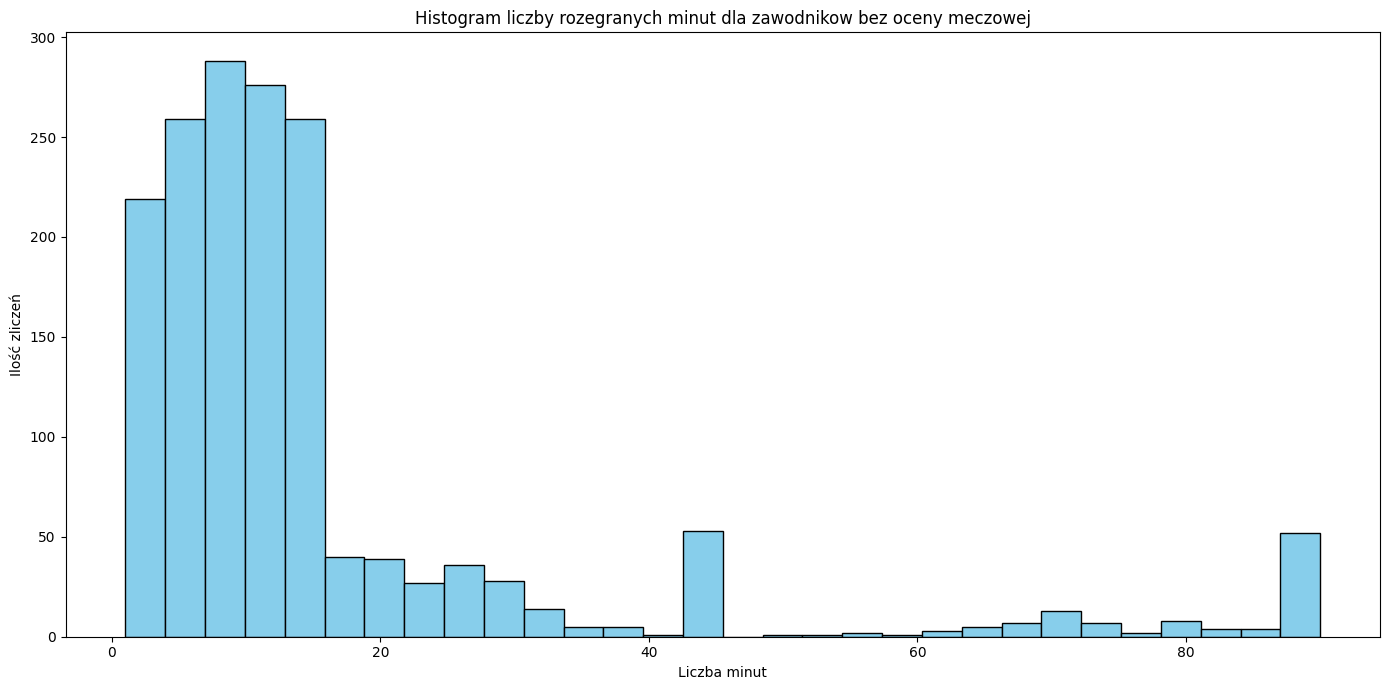

In [13]:
plt.figure(figsize=(14,7))
plt.hist(df_no_rating['MINUTES_PLAYED'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram liczby rozegranych minut dla zawodnikow bez oceny meczowej')
plt.xlabel('Liczba minut')
plt.ylabel('Ilość zliczeń')
plt.tight_layout()
plt.show()

O ile mozna bylo sie spodziewac wielu zliczen dla mniej niz 45 minut, to niepokojace so piki dla liczby minut wiekszej niz 60. <br>
Moze to sugerowac bledy w danych

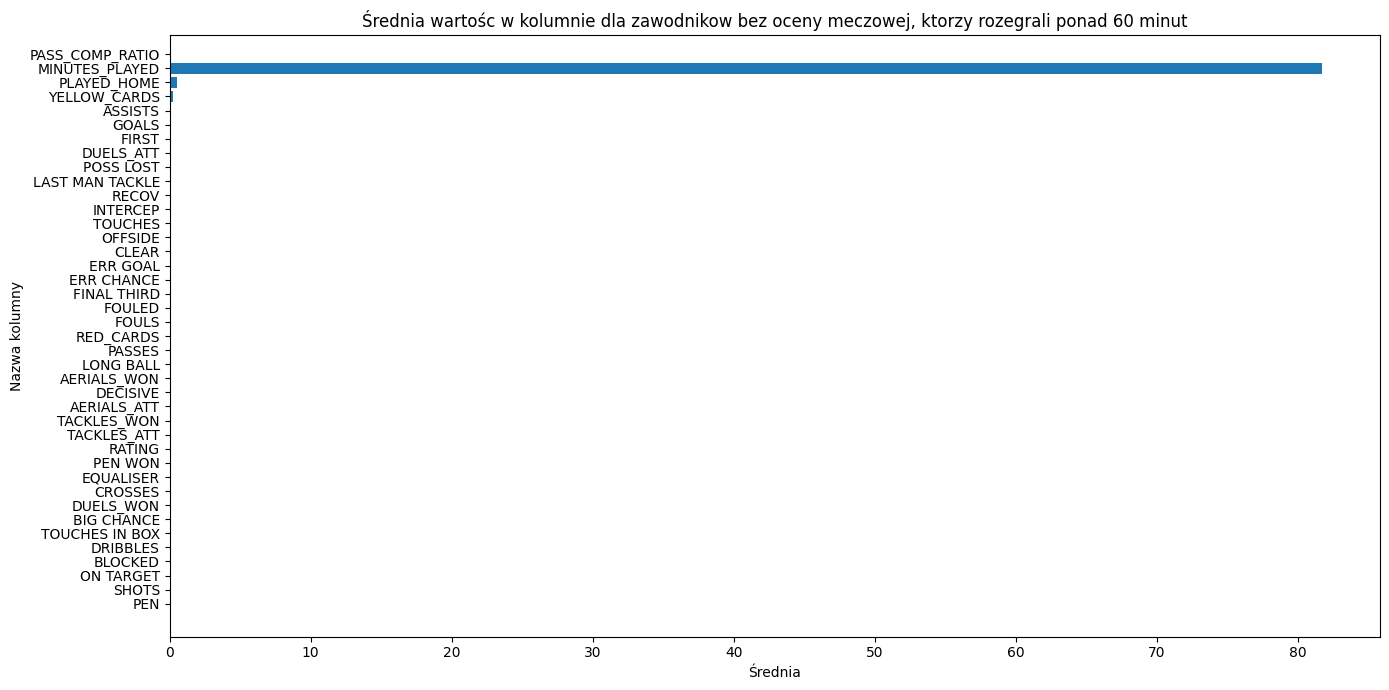

In [14]:
no_rating_means = df_no_rating[df_no_rating['MINUTES_PLAYED'] >= 60].mean(numeric_only=True).sort_values()

plt.figure(figsize=(14,7))
plt.barh(y=no_rating_means.index, width=no_rating_means)
plt.title('Średnia wartośc w kolumnie dla zawodnikow bez oceny meczowej, ktorzy rozegrali ponad 60 minut')
plt.xlabel('Średnia')
plt.ylabel('Nazwa kolumny')
plt.tight_layout()
plt.show()

Jak widac w prawie wszystkich kolumnach nie ma zadnych statystyk, co sugeruje brak danych dla tych wierszy

In [15]:
df_clean = df_clean[df_clean['RATING'] > 0]
print(df_clean.shape)
df_clean.head(5)

(8890, 45)


,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,DR,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,0.75,0
2,I. Diop,Fulham,DCR,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,0.80,0
3,C. Bassey,Fulham,DCL,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,0.92,0
4,A. Robinson,Fulham,DL,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,0.76,0
5,A. Pereira,Fulham,DMCR,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,0.74,0


In [16]:
na_values = df_clean.isna().sum().sort_values(ascending=False)
na_values.head(5)

PASS_COMP_RATIO    22
NAME                0
EQUALISER           0
ON TARGET           0
BLOCKED             0
dtype: int64

Zadziwia fakt, ze 740 zawodników nie zaliczyło celnego podania w meczu. Pora sprawdzic jak to sie stalo

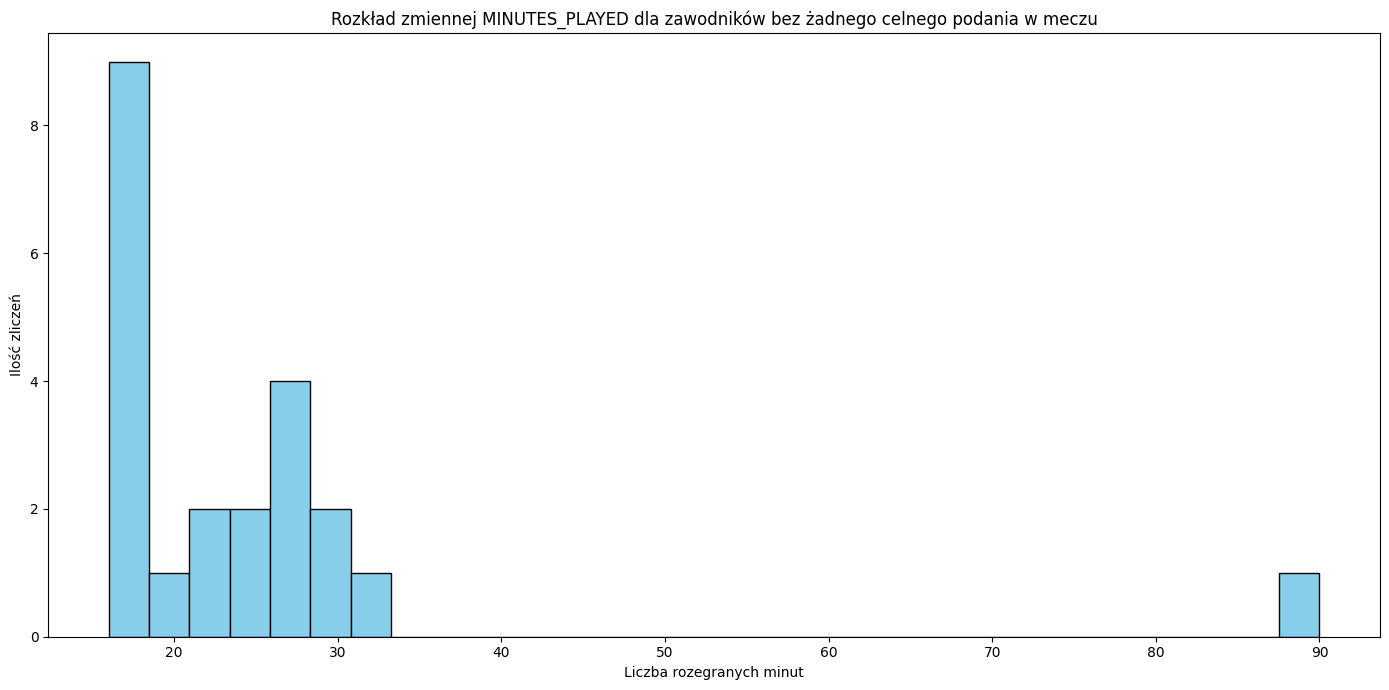

In [17]:
no_passes_idx = df_clean[df_clean['PASS_COMP_RATIO'].isnull()].index
no_passes_minutes_played = df_non_na['MINUTES_PLAYED'].iloc[no_passes_idx]

plt.figure(figsize=(14,7))
plt.hist(no_passes_minutes_played, bins=30, color='skyblue', edgecolor='black')
plt.title('Rozkład zmiennej MINUTES_PLAYED dla zawodników bez żadnego celnego podania w meczu')
plt.xlabel('Liczba rozegranych minut')
plt.ylabel('Ilość zliczeń')
plt.tight_layout()
plt.show()

Mozna było się spodziewać, ze sporo zawodników bez celnego podania w meczu rozegrało w jego trakcie niewiele minut. <br>
Logiczny równiez jest pik na okolicy 45 minut, gdyz brak jakiegokolwiek celnego podania sugeruje słaby występ, a tacy zawodnicy <br>
często są zmieniani w przerwie spotkania.
Zastanawia jednak fakt, ze nadal duzo zliczen jest dla wiekszej liczby minut niz 45, co moze sugerowac blad w danych

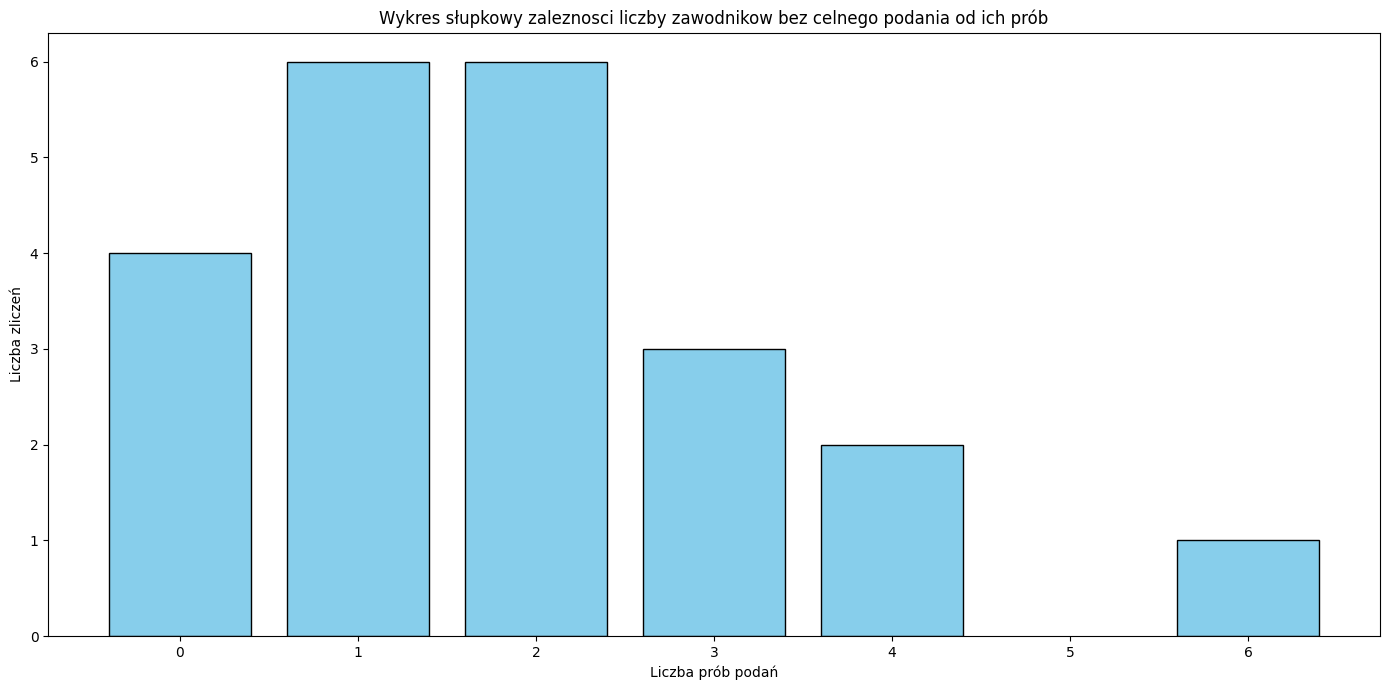

In [18]:
passes_attempted = df_clean['PASSES'][df_clean['PASS_COMP_RATIO'].isna()].value_counts().sort_values()

plt.figure(figsize=(14,7))
plt.bar(x=passes_attempted.index, height=passes_attempted, color='skyblue', edgecolor='black')
plt.title('Wykres słupkowy zaleznosci liczby zawodnikow bez celnego podania od ich prób')
plt.xlabel('Liczba prób podań')
plt.ylabel('Liczba zliczeń')
plt.tight_layout()
plt.show()

# CZY TO MA SENS?

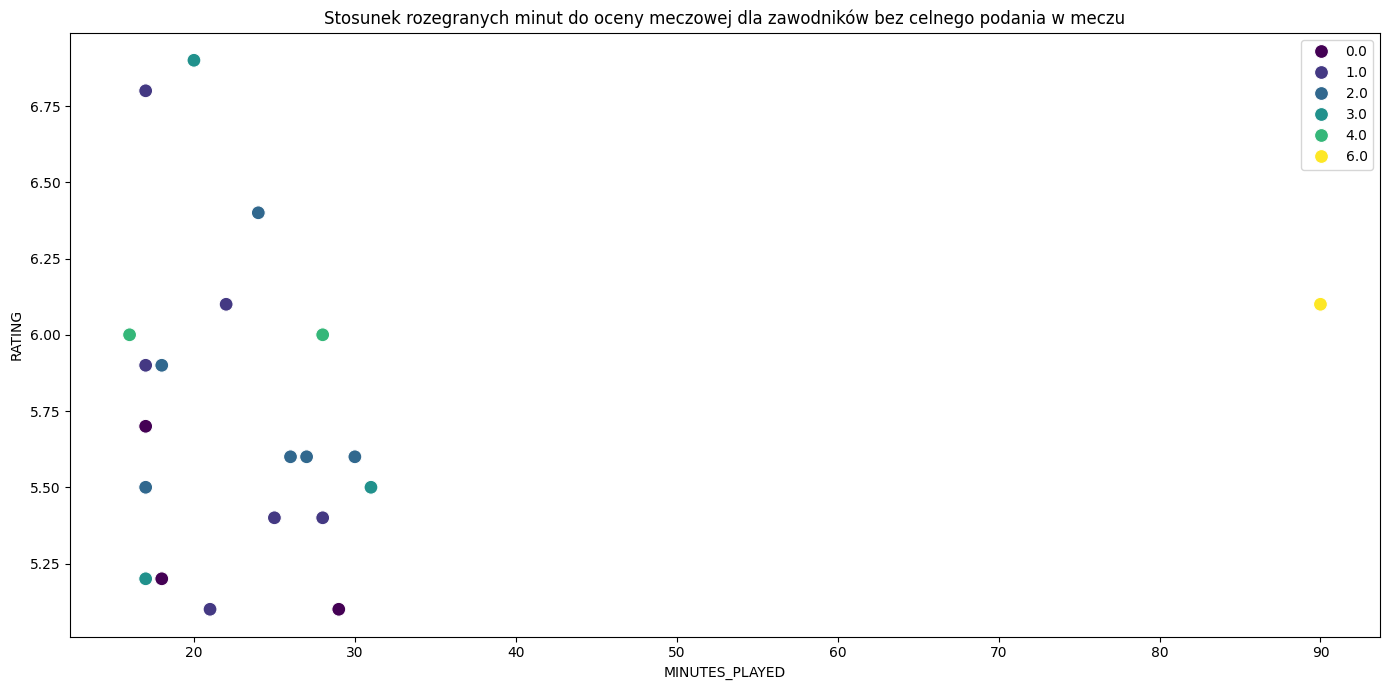

In [19]:
no_passes = df_non_na.iloc[no_passes_idx]

plt.figure(figsize=(14,7))
sns.scatterplot(data=no_passes, x='MINUTES_PLAYED', y='RATING', hue='PASSES', s=100, palette='viridis')
plt.xlabel('MINUTES_PLAYED')
plt.ylabel('RATING')
plt.title('Stosunek rozegranych minut do oceny meczowej dla zawodników bez celnego podania w meczu')
plt.legend()
plt.tight_layout()
plt.show()

### Czy zawodnicy bez celnego podania otrzymują nizsze oceny?

In [20]:
df_temp = df_clean.copy()
df_temp['NO_ACC_PASS'] =  (df_clean['PASS_COMP_RATIO'].isna()).astype(int)
df_temp.head(5)

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME,NO_ACC_PASS
1,K. Tete,Fulham,DR,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,0.75,0,0
2,I. Diop,Fulham,DCR,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,0.80,0,0
3,C. Bassey,Fulham,DCL,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,0.92,0,0
4,A. Robinson,Fulham,DL,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,0.76,0,0
5,A. Pereira,Fulham,DMCR,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,0.74,0,0


In [21]:
df_temp.groupby('NO_ACC_PASS')['RATING'].mean().reset_index()

,NO_ACC_PASS,RATING
0,0,6.495535
1,1,5.736364


In [22]:
group_0 = df_temp[df_temp['NO_ACC_PASS'] == 0]['RATING']
group_1 = df_temp[df_temp['NO_ACC_PASS'] == 1]['RATING']

t_stat, p_value = sp.stats.ttest_ind(group_0, group_1, equal_var=False)

if p_value < 0.05:
    print("Hipoteza zerowa jest odrzucona - istnieje istotna roznica w RATING miedzy grupami")
else:
    print("Nie ma podstaw do odrzucenia H0 - brak istotnej roznicy w RATING")
print(f'p_value = {p_value}')

Hipoteza zerowa jest odrzucona - istnieje istotna roznica w RATING miedzy grupami
p_value = 6.554583809413017e-07


### Zmniejszenie kardynalności zmiennej POS

- M: midfielder -> M
- F: forward -> F
- GK: goalkeeper -> drop
- DL: left defender -> D
- DR: right defender -> D
- S: striker -> F
- D: defender -> D
- DCR: defender central right -> D
- DCL: defender central left -> D
- DMCR: defensive midfielder central right -> M
- DMCL: defensive midfielder central left -> M
- AMR: attacking midfielder right -> M
- AML: attacking midfielder left -> M
- AMC: attacking midfielder central -> M
- MCR: midfielder central right -> M
- MCL: midfielder central left -> M
- DC: defender central -> D
- AMCR: attacking midfielder central right -> M
- AMCL: attacking midfielder central left -> M
- DML: defender mid left -> D 
- DMR: defender mid right -> D
- MC: midfielder central -> M
- WL: winger left -> F
- WR: winger right -> F
- ML: midfielder left -> M
- MR: midfielder right -> M
- FCR: forward central right -> F
- FCL: forward central left -> F
- DMC: defensive midfielder central -> M

In [28]:
pos_map = {
    "M": "M",
    "F": "F",
    "DL": "D",
    "DR": "D",
    "S": "F",
    "D": "D",
    "DCR": "D",
    "DCL": "D",
    "DMCR": "M",
    "DMCL": "M",
    "AMR": "M",
    "AML": "M",
    "AMC": "M",
    "MCR": "M",
    "MCL": "M",
    "DC": "D",
    "AMCR": "M",
    "AMCL": "M",
    "DML": "D",
    "DMR": "D",
    "MC": "M",
    "WL": "F",
    "WR": "F",
    "ML": "M",
    "MR": "M",
    "FCR": "F",
    "FCL": "F",
    "DMC": "M"
}


In [29]:
df_clean['POS'] = df_clean['POS'].map(pos_map)
print(df_clean.shape)
df_clean.head(5)

(8890, 45)


,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,0.75,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,0.80,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,0.92,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,0.76,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,0.74,0


### Rozkład zmiennej objaśnianej

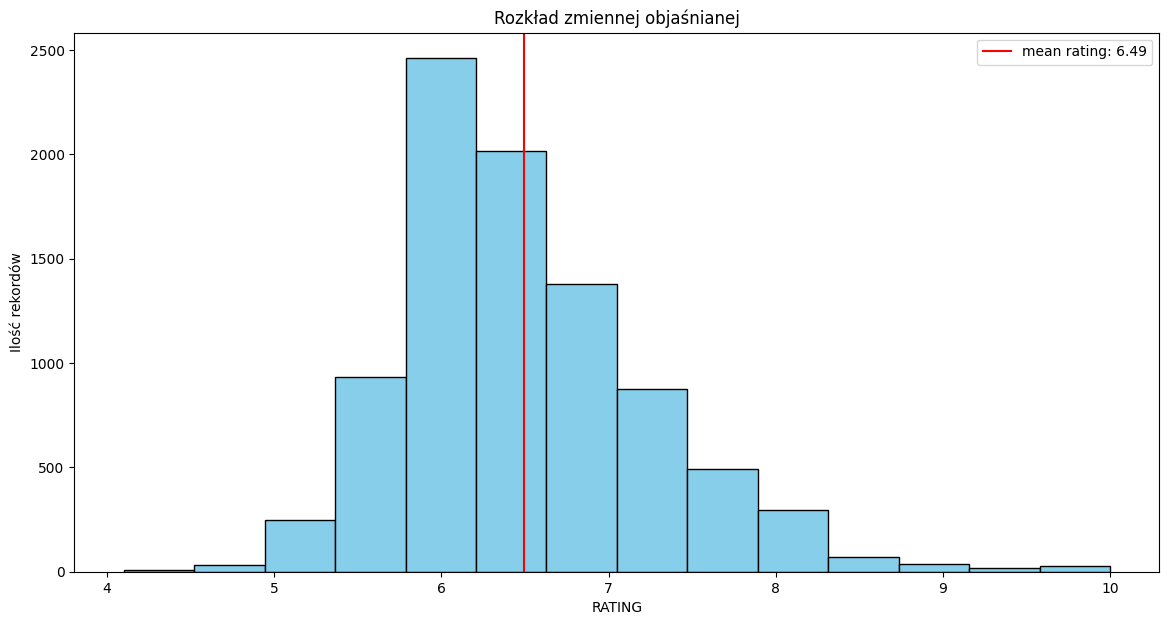

In [34]:
no_of_bins = int(1+np.log2(len(df_clean)))
mean_rating = df_clean['RATING'].mean()

plt.figure(figsize=(14,7))
plt.hist(df_clean['RATING'], color='skyblue', edgecolor='black', bins=no_of_bins)
plt.axvline(x=mean_rating, color='red', label=f'mean rating: {round(mean_rating,2)}')
plt.xlabel('RATING')
plt.ylabel('Ilość rekordów')
plt.title('Rozkład zmiennej objaśnianej')
plt.legend()
plt.show()

In [35]:
test, p_value = sp.stats.normaltest(df_clean['RATING'])
if p_value <= 0.05:
    print(f'Na 95% rozkład zmiennej objaśnianej nie pochodzi z rozkładu normalnego\np_value = {p_value}')
else:
    print(f'Na 95% nie ma podstaw do odrzucenia hipotezy o rozkładzie normalnym zmiennej objaśnianej\np_value = {p_value}')

Na 95% rozkład zmiennej objaśnianej nie pochodzi z rozkładu normalnego
p_value = 1.471862532730036e-233


## Czy są zawodnicy, którzy zagrali dla więcej niz jednego zespołu w trakcie sezonu?

In [36]:
df_clean.groupby('NAME')['TEAM'].nunique().sort_values(ascending=False).head(5).reset_index()

,NAME,TEAM
0,J. Philogene,2
1,B. Johnson,2
2,T. Chalobah,2
3,A. Disasi,2
4,J. Enciso,2


Rzeczywiście kazdy z ukazanych wyzej przypadkow da sie wyjasnic: 

Jaden Philogene przeszedl z Aston Villi do Ipswich <br>
B. Johnson to 2 roznych zawodnikow - pierwszy z nich to Brennan Johnson, który gra dla Tottenhamu, a drugi to Ben Johnson, zawodnik Ipswich <br>
Trevor Chalobach przeszedł z Chelsea do Crystal Palace
Axel Disasi przeszedł z Chelsea do Aston Villa <br>
Julio Enciso przeszedł z Ipswich do Brighton <br>

In [37]:
def fix_name(row: pd.Series) -> pd.Series:
    if row['NAME'] == 'B. Johnson':
        if row['COUNTRY'] == 'England':
            row['NAME'] = 'Ben Johnson'
        elif row['COUNTRY'] == 'Wales':
            row['NAME'] = 'Brennan Johnson'
    return row

In [38]:
df_clean = df_clean.apply(fix_name, axis=1)
df_clean[(df_clean['NAME'] == 'Ben Johnson') | (df_clean['NAME'] == 'Brennan Johnson')].head(5)

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
57,Ben Johnson,Ipswich,M,England,33,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,21.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-17,4,2,2,1,8,5,0.78,1
281,Brennan Johnson,Tottenham,F,Wales,78,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,44.0,0.0,3.0,0.0,26.0,17.0,0.0,0.0,2.0,1.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,6.5,2024-08-19,6,3,2,1,12,8,0.77,0
405,Ben Johnson,Ipswich,D,England,90,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,16.0,0.0,39.0,2.0,2.0,0.0,15.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,6.2,2024-08-24,3,2,0,0,13,4,0.67,0
429,Brennan Johnson,Tottenham,F,Wales,90,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,0.0,29.0,0.0,0.0,0.0,19.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,5.8,2024-08-24,2,2,2,1,7,3,0.79,1
839,Brennan Johnson,Tottenham,M,Wales,45,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,32.0,0.0,5.0,0.0,20.0,14.0,0.0,0.0,2.0,1.0,0.0,2.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,2024-09-01,2,2,2,2,7,6,0.75,0


## jak rozni sie wplyw poszczegolnych statystyk na ocene meczowa w zaleznosci od pozycji

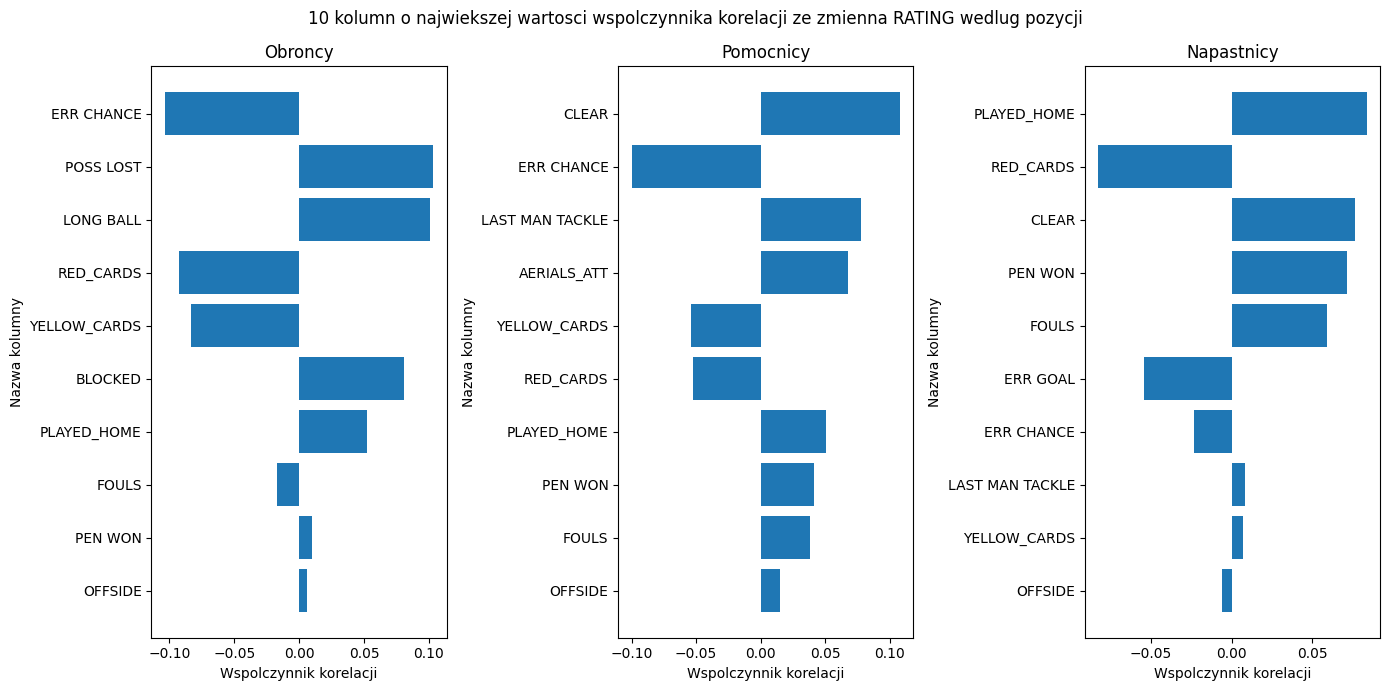

In [45]:
defenders = df_clean[df_clean['POS'] == 'D']
midfielders = df_clean[df_clean['POS'] == 'M']
forwards = df_clean[df_clean['POS'] == 'F']

defenders_corr = defenders.corr(numeric_only=True)['RATING'].sort_values(key=abs).head(10)
midfielders_corr = midfielders.corr(numeric_only=True)['RATING'].sort_values(key=abs).head(10)
forwards_corr = forwards.corr(numeric_only=True)['RATING'].sort_values(key=abs).head(10)

fig, axes = plt.subplots(1, 3, figsize=(14,7))
axes[0].barh(y=defenders_corr.index, width=defenders_corr)
axes[0].set_xlabel('Wspolczynnik korelacji')
axes[0].set_ylabel('Nazwa kolumny')
axes[0].set_title('Obroncy')
axes[1].barh(y=midfielders_corr.index, width=midfielders_corr)
axes[1].set_xlabel('Wspolczynnik korelacji')
axes[1].set_ylabel('Nazwa kolumny')
axes[1].set_title('Pomocnicy')
axes[2].barh(y=forwards_corr.index, width=forwards_corr)
axes[2].set_xlabel('Wspolczynnik korelacji')
axes[2].set_ylabel('Nazwa kolumny')
axes[2].set_title('Napastnicy')
plt.suptitle('10 kolumn o najwiekszej wartosci wspolczynnika korelacji ze zmienna RATING wedlug pozycji')
plt.tight_layout()
plt.show()


czy srednia ocena zawodnika z klubu ma zwiazek z miejscem w tabeli

In [ ]:
t = df_clean.groupby('TEAM')['RATING'].agg(['mean', 'median', 'std']).sort_values(ascending=False, by='mean')
t['RATING_POS'] = np.arange(1,21,1)
t

,mean,median,std,RATING_POS
TEAM,,,,
Man City,6.870670,6.7,0.813824,1
Liverpool,6.772473,6.6,0.823664,2
Arsenal,6.764465,6.7,0.779658,3
Chelsea,6.682217,6.6,0.760380,4
Newcastle,6.584116,6.4,0.781222,5
Brighton,6.531136,6.4,0.712791,6
Man Utd,6.530568,6.4,0.763603,7
Bournemouth,6.514159,6.4,0.734710,8
Fulham,6.507143,6.4,0.643044,9


In [143]:
df_table = pd.read_csv('premier_league_2024_25_table.csv')
df_table

,Club,Position
0,Liverpool,1
1,Arsenal,2
2,Man City,3
3,Chelsea,4
4,Newcastle,5
5,Aston Villa,6
6,Notts Forest,7
7,Brighton,8
8,Bournemouth,9
9,Brentford,10


In [144]:
df_pos_rating = pd.merge(left=t, right=df_table, left_on='TEAM', right_on='Club', how='inner')
df_pos_rating

,mean,median,std,RATING_POS,Club,Position
0,6.870670,6.7,0.813824,1,Man City,3
1,6.772473,6.6,0.823664,2,Liverpool,1
2,6.764465,6.7,0.779658,3,Arsenal,2
3,6.682217,6.6,0.760380,4,Chelsea,4
4,6.584116,6.4,0.781222,5,Newcastle,5
5,6.531136,6.4,0.712791,6,Brighton,8
6,6.530568,6.4,0.763603,7,Man Utd,15
7,6.514159,6.4,0.734710,8,Bournemouth,9
8,6.507143,6.4,0.643044,9,Fulham,11
9,6.482944,6.4,0.764716,10,Brentford,10


In [145]:
df_pos_rating['RATING_POS'].corr(df_pos_rating['Position'])

0.8466165413533834

In [146]:
df_pos_rating['ABS_RATING_POS_DIFFERENCE'] = abs(df_pos_rating['RATING_POS'] - df_pos_rating['Position'])
df_pos_rating.sort_values(by='ABS_RATING_POS_DIFFERENCE', ascending=False)

,mean,median,std,RATING_POS,Club,Position,ABS_RATING_POS_DIFFERENCE
6,6.530568,6.4,0.763603,7,Man Utd,15,8
12,6.465795,6.4,0.726890,13,Aston Villa,6,7
10,6.479913,6.4,0.781984,11,Tottenham,17,6
11,6.466813,6.4,0.698565,12,Notts Forest,7,5
8,6.507143,6.4,0.643044,9,Fulham,11,2
15,6.422296,6.4,0.660860,16,West Ham,14,2
14,6.434339,6.3,0.708703,15,Everton,13,2
13,6.444270,6.4,0.719919,14,Crystal Palace,12,2
0,6.870670,6.7,0.813824,1,Man City,3,2
5,6.531136,6.4,0.712791,6,Brighton,8,2


najlepsze wystepy

In [ ]:
df_clean.sort_values(by='RATING', ascending=False)

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
564,N. Madueke,Chelsea,M,England,90,3.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,11.0,0.0,38.0,0.0,4.0,0.0,18.0,6.0,0.0,0.0,6.0,5.0,0.0,0.0,6.0,1.0,2.0,1.0,0.0,0.0,0.0,10.0,2024-08-25,1,1,0,0,8,3,83.0,0
878,M. Salah,Liverpool,M,Egypt,90,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,13.0,2.0,53.0,1.0,5.0,0.0,34.0,21.0,2.0,0.0,3.0,1.0,1.0,2.0,11.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,2024-09-01,1,1,0,0,9,5,76.0,0
1542,B. Saka,Arsenal,M,England,90,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,20.0,0.0,102.0,1.0,4.0,0.0,54.0,39.0,0.0,0.0,7.0,2.0,4.0,8.0,14.0,4.0,11.0,0.0,0.0,0.0,0.0,10.0,2024-09-28,2,1,1,0,24,12,93.0,1
1570,C. Palmer,Chelsea,M,England,90,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,2.0,46.0,0.0,4.0,0.0,25.0,14.0,7.0,1.0,7.0,5.0,0.0,1.0,6.0,3.0,4.0,1.0,0.0,1.0,0.0,10.0,2024-09-28,1,1,0,0,5,3,68.0,1
6269,J. Kluivert,Bournemouth,M,Netherlands,90,3.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,15.0,0.0,51.0,0.0,7.0,0.0,29.0,20.0,2.0,0.0,3.0,3.0,0.0,1.0,4.0,0.0,5.0,1.0,1.0,0.0,0.0,10.0,2025-01-18,0,0,0,0,6,2,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,14.0,0.0,68.0,2.0,4.0,0.0,55.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,2024-12-29,4,0,3,2,8,7,80.0,1
891,Casemiro,Man Utd,M,Brazil,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,14.0,0.0,45.0,0.0,3.0,0.0,37.0,6.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2024-09-01,1,1,1,1,6,3,70.0,1
9472,N. Mazraoui,Man Utd,D,Morocco,78,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,38.0,0.0,1.0,0.0,31.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2025-04-13,3,0,5,1,9,4,87.0,0
5748,Y. Sugawara,Southampton,D,Japan,45,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,0.0,19.0,0.0,1.0,0.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.1,2025-01-04,0,0,1,0,0,0,86.0,1


In [ ]:
df_clean.sort_values(by='RATING', ascending=True)

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
5748,Y. Sugawara,Southampton,D,Japan,45,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,0.0,19.0,0.0,1.0,0.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.1,2025-01-04,0,0,1,0,0,0,86.0,1
4555,C. Coady,Leicester,D,England,90,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,9.0,0.0,58.0,0.0,2.0,0.0,50.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,2024-12-14,1,0,1,1,3,2,84.0,0
891,Casemiro,Man Utd,M,Brazil,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,14.0,0.0,45.0,0.0,3.0,0.0,37.0,6.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2024-09-01,1,1,1,1,6,3,70.0,1
9472,N. Mazraoui,Man Utd,D,Morocco,78,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,38.0,0.0,1.0,0.0,31.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2025-04-13,3,0,5,1,9,4,87.0,0
5392,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,14.0,0.0,68.0,2.0,4.0,0.0,55.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,2024-12-29,4,0,3,2,8,7,80.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,E. Haaland,Man City,M,Norway,90,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,21.0,0.0,1.0,0.0,12.0,7.0,0.0,0.0,5.0,4.0,0.0,0.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,10.0,2024-08-31,2,2,0,0,4,3,67.0,0
6623,D. Ouattara,Bournemouth,F,Burkina Faso,90,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,15.0,2.0,37.0,0.0,0.0,0.0,16.0,8.0,0.0,0.0,4.0,4.0,0.0,1.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,2025-01-25,1,1,6,2,14,5,81.0,1
878,M. Salah,Liverpool,M,Egypt,90,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,13.0,2.0,53.0,1.0,5.0,0.0,34.0,21.0,2.0,0.0,3.0,1.0,1.0,2.0,11.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,2024-09-01,1,1,0,0,9,5,76.0,0
7142,Y. Minteh,Brighton,D,Gambia,89,2.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,9.0,1.0,35.0,1.0,5.0,0.0,12.0,5.0,0.0,0.0,2.0,2.0,0.0,3.0,7.0,1.0,2.0,0.0,0.0,0.0,0.0,10.0,2025-02-14,5,4,5,2,22,12,67.0,1


In [ ]:
df_clean.groupby('NAME')['GOALS'].sum().sort_values(ascending=False)

NAME
M. Salah            29.0
A. Isak             23.0
E. Haaland          22.0
B. Mbeumo           20.0
C. Wood             20.0
                    ... 
D. Jebbison          0.0
D. Ings              0.0
D. Dalot             0.0
M. Gusto             0.0
Youssef Chermiti     0.0
Name: GOALS, Length: 460, dtype: float64

In [ ]:
df_clean.groupby('NAME')['RATING'].mean().sort_values(ascending=False)

NAME
M. Salah            7.497368
M. Kovačić          7.221429
B. Saka             7.212000
B. Fernandes        7.211111
J. Doku             7.180952
                      ...   
D. Mubama           5.400000
Youssef Chermiti    5.400000
A. Grønbaek         5.350000
H. Armstrong        5.300000
B. Godfrey          5.166667
Name: RATING, Length: 460, dtype: float64

In [ ]:
df_clean

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,M,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1
11313,J. Kluivert,Bournemouth,M,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1
11314,A. Semenyo,Bournemouth,M,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1
11315,Evanilson,Bournemouth,F,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1


# MACHINE LEARNING

In [ ]:
df_clean

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,M,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1
11313,J. Kluivert,Bournemouth,M,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1
11314,A. Semenyo,Bournemouth,M,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1
11315,Evanilson,Bournemouth,F,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1


In [ ]:
df_clean = pd.get_dummies(df_clean, columns=['POS'])
df_clean

,NAME,TEAM,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME,POS_D,POS_F,POS_M
1,K. Tete,Fulham,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0,True,False,False
2,I. Diop,Fulham,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0,True,False,False
3,C. Bassey,Fulham,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0,True,False,False
4,A. Robinson,Fulham,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0,True,False,False
5,A. Pereira,Fulham,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1,False,False,True
11313,J. Kluivert,Bournemouth,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1,False,False,True
11314,A. Semenyo,Bournemouth,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1,False,False,True
11315,Evanilson,Bournemouth,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1,False,True,False


In [ ]:
df_clean[['POS_D', 'POS_M', 'POS_F']] = df_clean[['POS_D', 'POS_M', 'POS_F']].astype(int)
df_clean

,NAME,TEAM,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME,POS_D,POS_F,POS_M
1,K. Tete,Fulham,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0,1,0,0
2,I. Diop,Fulham,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0,1,0,0
3,C. Bassey,Fulham,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0,1,0,0
4,A. Robinson,Fulham,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0,1,0,0
5,A. Pereira,Fulham,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1,0,0,1
11313,J. Kluivert,Bournemouth,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1,0,0,1
11314,A. Semenyo,Bournemouth,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1,0,0,1
11315,Evanilson,Bournemouth,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(['NAME', 'TEAM', 'COUNTRY', 'RATING', 'Date'], axis=1)
y = df_clean['RATING']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


DT = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, max_features=None, random_state=101)
DT.fit(X_train, y_train)
pred = DT.predict(X_test)
print(f'Mean squared error: {mean_squared_error(y_test, pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test, pred)}')
print(f'R2 score: {r2_score(y_test, pred)}')

Mean squared error: 0.2521766029246344
Mean absolute error: 0.37137232845894275
R2 score: 0.5544461534090963


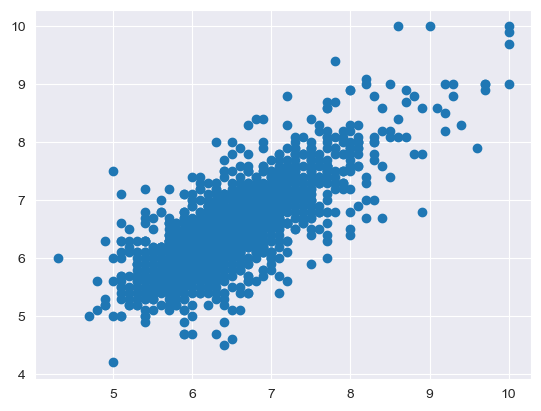

In [159]:
plt.scatter(y_test, pred)

In [160]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

print(f'Mean squared error: {mean_squared_error(y_test, RF_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test, RF_pred)}')
print(f'R2 score: {r2_score(y_test, RF_pred)}')

Mean squared error: 0.1166331619797525
Mean absolute error: 0.25027221597300336
R2 score: 0.7939287255143597


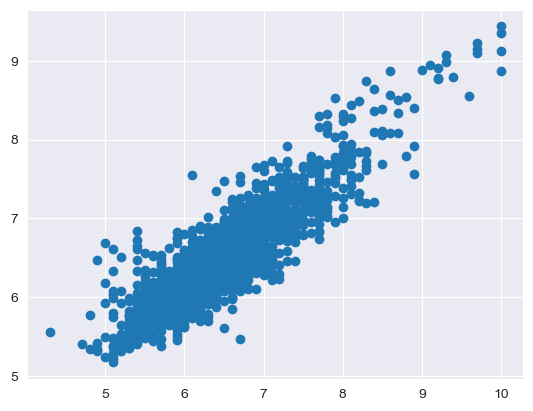

In [161]:
plt.scatter(y_test, RF_pred)

In [162]:
RF.feature_importances_

array([1.34250727e-02, 2.60103462e-01, 6.48445797e-02, 3.57829723e-03,
       2.12523762e-03, 5.39530285e-03, 4.14892234e-03, 1.94014671e-02,
       4.96173857e-03, 2.40003137e-02, 1.62309363e-02, 1.35455509e-03,
       2.38392925e-01, 1.72422042e-02, 1.56454756e-02, 1.29796678e-02,
       1.81735384e-02, 2.20160523e-02, 1.22418394e-02, 5.51265123e-04,
       5.62309218e-03, 8.60079996e-03, 1.94415729e-03, 5.91163587e-03,
       1.43665480e-02, 7.18940856e-02, 6.07189386e-03, 3.51450072e-04,
       2.45072733e-04, 1.26451714e-04, 8.86105920e-05, 7.46580100e-03,
       4.04878068e-02, 7.42427491e-03, 8.02386146e-03, 9.48230874e-03,
       1.64249596e-02, 3.04405875e-02, 2.59338382e-03, 2.50435535e-03,
       1.62485293e-03, 1.49115798e-03])